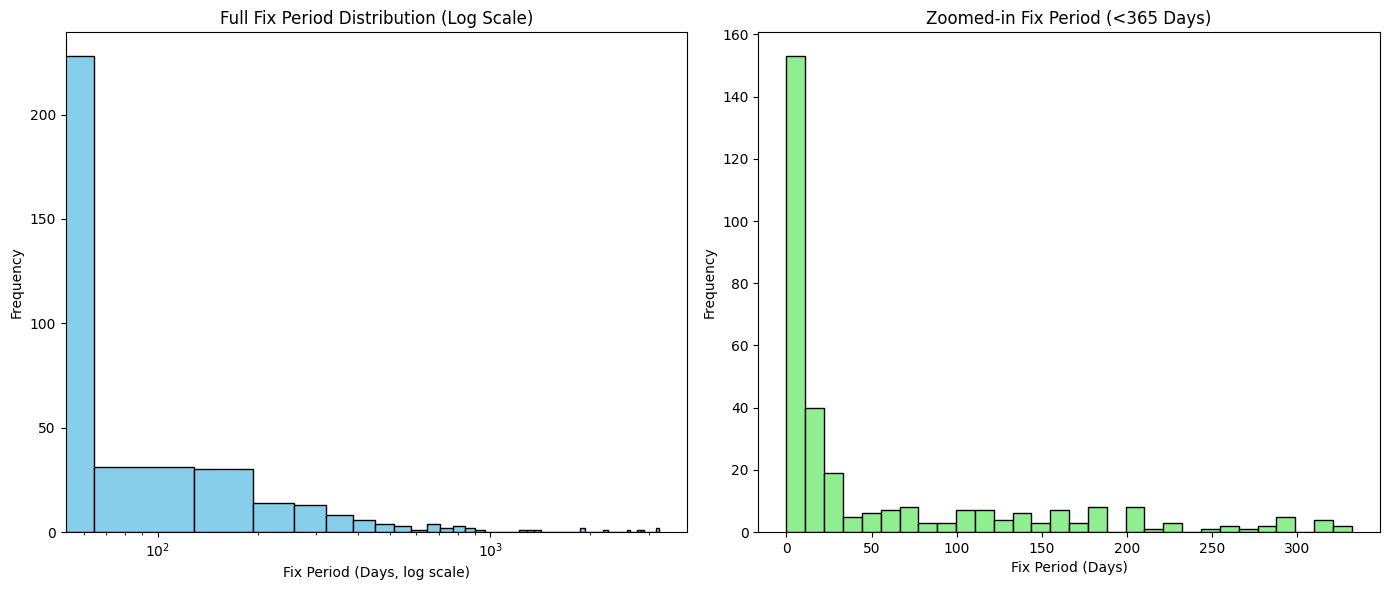

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('regression_information.csv')  # Replace with your actual CSV file

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(df['fix_period'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xscale('log')  # Log scale for wide range
axes[0].set_title('Full Fix Period Distribution (Log Scale)')
axes[0].set_xlabel('Fix Period (Days, log scale)')
axes[0].set_ylabel('Frequency')

zoom_data = df[df['fix_period'] < 365]['fix_period']
axes[1].hist(zoom_data, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Zoomed-in Fix Period (<365 Days)')
axes[1].set_xlabel('Fix Period (Days)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
# Analyse the distribution of fix periods
fix_period_stats = df['fix_period'].describe()
print("====fix_period_stats====")
print(fix_period_stats)

# Analyse the distribution of file changes
BIC_LOC_changes_stats = df['BIC_LOC_changes'].describe()
print("====BIC_LOC_changes_stats====")
print(BIC_LOC_changes_stats)
BFC_LOC_changes_stats = df['BFC_LOC_changes'].describe()
print("====BFC_LOC_changes_stats====")
print(BFC_LOC_changes_stats)

====fix_period_stats====
count     361.000000
mean      167.135734
std       424.974870
min         0.000000
25%         2.000000
50%        17.000000
75%       153.000000
max      3219.000000
Name: fix_period, dtype: float64
====BIC_LOC_changes_stats====
count      361.000000
mean       929.656510
std       5152.258622
min          1.000000
25%         16.000000
50%         64.000000
75%        234.000000
max      48047.000000
Name: BIC_LOC_changes, dtype: float64
====BFC_LOC_changes_stats====
count     361.000000
mean       32.681440
std       160.526377
min         0.000000
25%         4.000000
50%         9.000000
75%        26.000000
max      2907.000000
Name: BFC_LOC_changes, dtype: float64


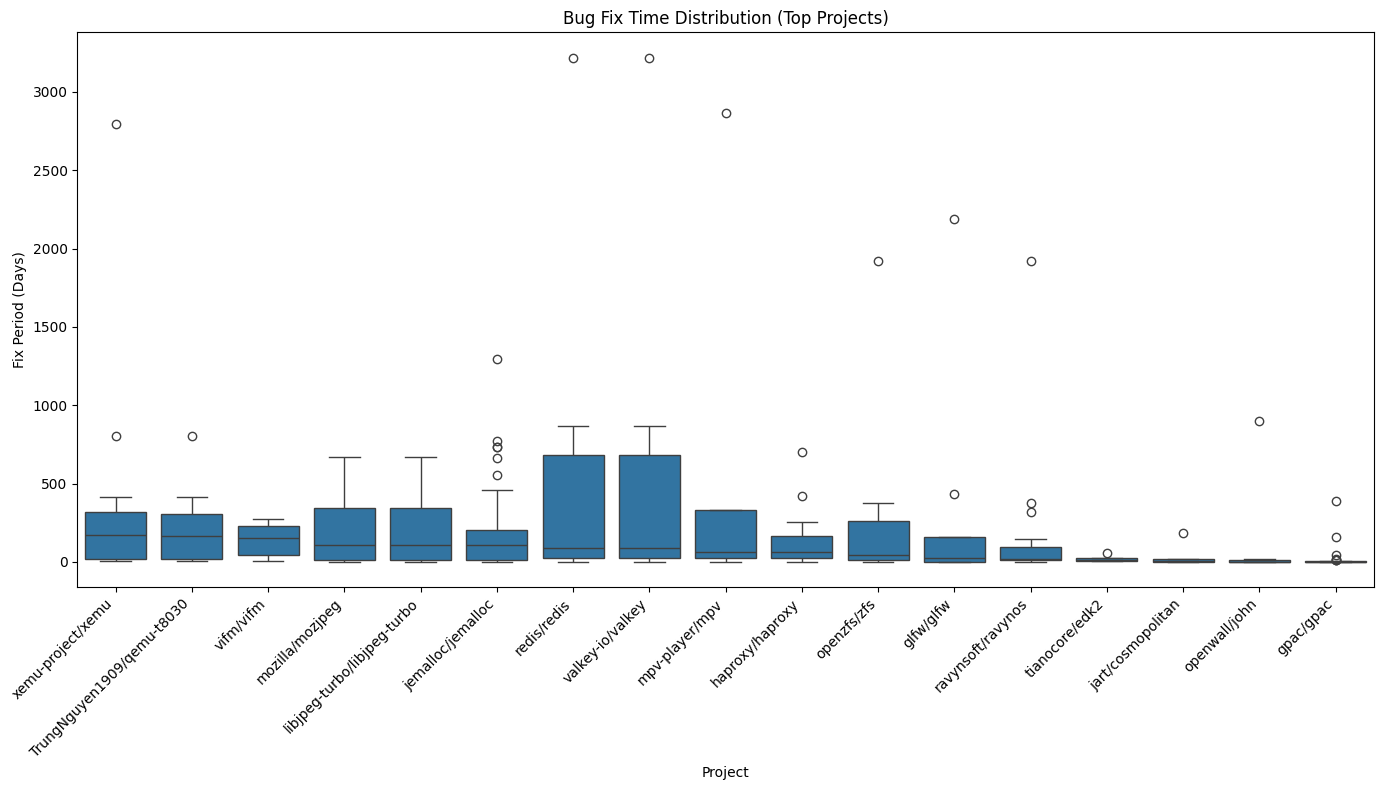

In [16]:
import seaborn as sns

# Count how many times each project appears
project_counts = df['repo'].value_counts()

# Keep only projects with more than 5 regression chains, this number can be change later
top_projects = project_counts[project_counts >= 5].index

# Filter the DataFrame
filtered_df = df[df['repo'].isin(top_projects)]

# Plot with filtered data
plt.figure(figsize=(14, 8))
order = filtered_df.groupby('repo')['fix_period'].median().sort_values(ascending=False).index
sns.boxplot(data=filtered_df, x='repo', y='fix_period', order=order)
plt.xticks(rotation=45, ha='right')
plt.title('Bug Fix Time Distribution (Top Projects)')
plt.xlabel('Project')
plt.ylabel('Fix Period (Days)')
plt.tight_layout()
plt.show()

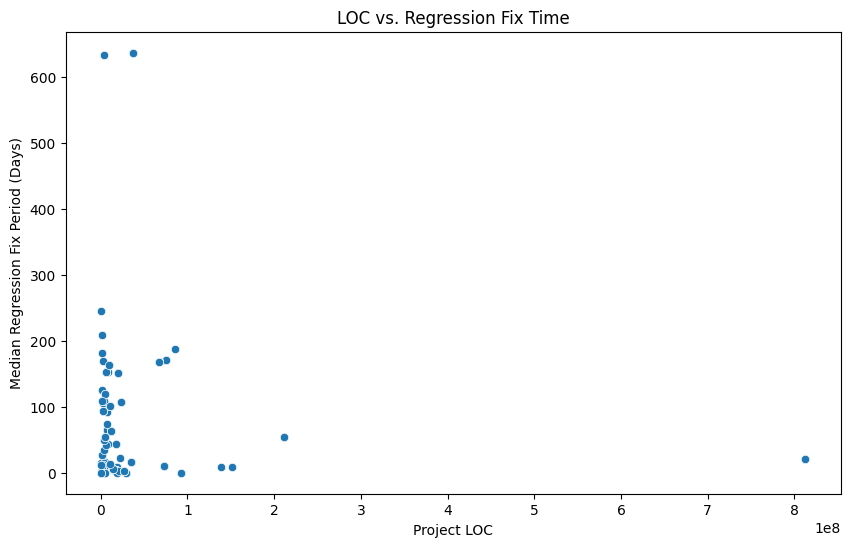

Spearman Correlation: -0.029
Pearson Correlation: -0.106


In [23]:
from scipy.stats import spearmanr, pearsonr

# Scatter plot with LOC vs. median fix period
plt.figure(figsize=(10, 6))
df["median_fix_period"] = df.groupby('repo')['fix_period'].transform('median')
# plt.xscale('log')
sns.scatterplot(data=df, x='LOC_Clanguage', y='median_fix_period')
plt.xlabel('Project LOC')
plt.ylabel('Median Regression Fix Period (Days)')
plt.title('LOC vs. Regression Fix Time')
plt.show()

# Correlation test
spearman_corr, _ = spearmanr(df['LOC_Clanguage'], df['median_fix_period'])
pearson_corr, _ = pearsonr(df['LOC_Clanguage'], df['median_fix_period'])
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Pearson Correlation: {pearson_corr:.3f}")


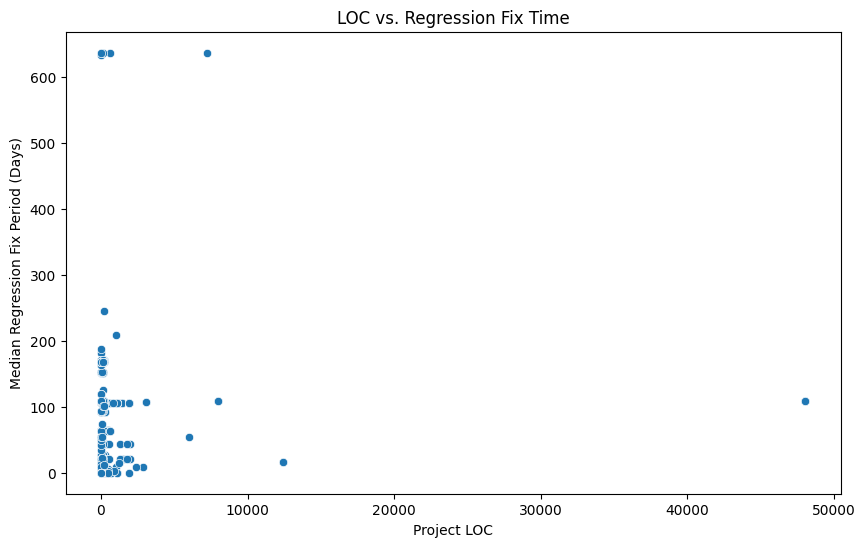

Spearman Correlation: 0.156
Pearson Correlation: 0.061


In [25]:
# Scatter plot with lines changed in BIC vs. median fix period
plt.figure(figsize=(10, 6))
df["median_fix_period"] = df.groupby('repo')['fix_period'].transform('median')
# plt.xscale('log')
sns.scatterplot(data=df, x='BIC_LOC_changes', y='median_fix_period')
plt.xlabel('Project LOC')
plt.ylabel('Median Regression Fix Period (Days)')
plt.title('LOC vs. Regression Fix Time')
plt.show()

# Correlation test
spearman_corr, _ = spearmanr(df['BIC_LOC_changes'], df['median_fix_period'])
pearson_corr, _ = pearsonr(df['BIC_LOC_changes'], df['median_fix_period'])
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Pearson Correlation: {pearson_corr:.3f}")